In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV



In [16]:
file_path = 'creditcard.csv' 

fraud_data = pd.read_csv(file_path)

In [17]:
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
fraud_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
fraud_data.duplicated().sum()

1081

In [18]:
fraud_data = fraud_data.drop_duplicates()

In [19]:
fraud_data.duplicated().sum()

0

In [10]:
fraud_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

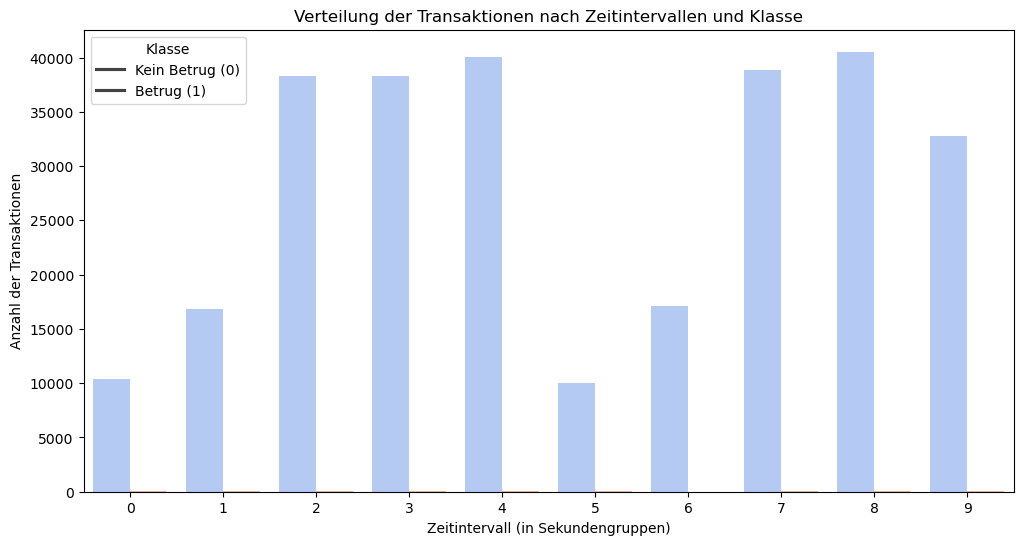

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Zeit in Intervalle unterteilen
fraud_data['Time_Interval'] = pd.cut(fraud_data['Time'], bins=10, labels=False)

# Gruppieren nach Zeitintervallen und Klasse
grouped_data = fraud_data.groupby(['Time_Interval', 'Class']).size().reset_index(name='Count')

# Balkendiagramm erstellen
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Time_Interval', y='Count', hue='Class', palette='coolwarm')
plt.title('Verteilung der Transaktionen nach Zeitintervallen und Klasse')
plt.xlabel('Zeitintervall (in Sekundengruppen)')
plt.ylabel('Anzahl der Transaktionen')
plt.legend(title='Klasse', labels=['Kein Betrug (0)', 'Betrug (1)'])
plt.show()


In [11]:
fraud_data['Class'].value_counts()

#starke imbalance der Betrugs und Legitimen Transaktionen

Class
0    283253
1       473
Name: count, dtype: int64

Es herscht eine starke Imbalance der Betrugs und Legitimen Transaktionen, das muss behoben werden, da sonst das modell einfach alles als Legitim abstempelt und es wird trotzdem eine hohe genauigkeit erreichen da der Anteil der legitimen Transaktionen über 99% Prozent beträgt. Das lösen wir durch methoden wie oversampling etc. Oder man ändert die gewichtung der zwei Fälle und schafft so eine Balance.


Zuerst müssen wir uns aber um die features Time und Amount kümmern, da diese die einzigen sind die noch nicht skaliert sind. Im gegensatz dazu sind die features V1-V28 das resultat eines PCA-Verfahrens, das aus den Originaldaten künstliche Merkmale erstellt hat und intime Daten wie Kreditkartenummer, Transaktionsdetails etc. anonymisiert hat. Außerdem entfernt PCA stark korrelierende oder redundante Daten bzw. features.

In [12]:
scaler = StandardScaler()
fraud_data[['Time', 'Amount']] = scaler.fit_transform(fraud_data[['Time', 'Amount']])

In [13]:
fraud_corr = fraud_data.corr('pearson')
fraud_corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


In [15]:
fraud_corr['Class'].abs().sort_values(ascending=False)

Class     1.000000
V17       0.313498
V14       0.293375
V12       0.250711
V10       0.206971
V16       0.187186
V3        0.182322
V7        0.172347
V11       0.149067
V4        0.129326
V18       0.105340
V1        0.094486
V9        0.094021
V5        0.087812
V2        0.084624
V6        0.043915
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
Time      0.012359
V28       0.009682
V24       0.007210
V23       0.006333
Amount    0.005777
V22       0.004887
V26       0.004265
V13       0.003897
V15       0.003300
V25       0.003202
Name: Class, dtype: float64

In [12]:
fraud_data.head()
# time vielleicht entfernen, später probieren

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


Jetzt sind die Features 'Time' und 'Amount' skaliert und wir könne uns dem Logistic Regression model zuwenden

In [13]:
# Zuerst teilen wir unsere features vom Label

X = fraud_data.drop('Class', axis=1)
y = fraud_data['Class']

In [14]:
# jetzt machen wir den train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Logistic Regression mit Klassengewicht
LG_model_balanced = LogisticRegression(class_weight='balanced', random_state=42)
LG_model_balanced.fit(X_train, y_train)
# logistic regression für ja, nein benutzt, rechnet zudem Wahrscheinlichkeit aus


LogisticRegression(class_weight='balanced', random_state=42)

In [16]:
# hier versuchen wir es mal mit einer anderen methode um eine balance zu erschaffen und schauen dann welche methode besser abschneidet

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

LG_model_SMOTE = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
LG_model_SMOTE.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [17]:
y_train_resampled.value_counts()

Class
0    226602
1    226602
Name: count, dtype: int64

Konfusionsmatrix:
[[55255  1396]
 [   12    83]]


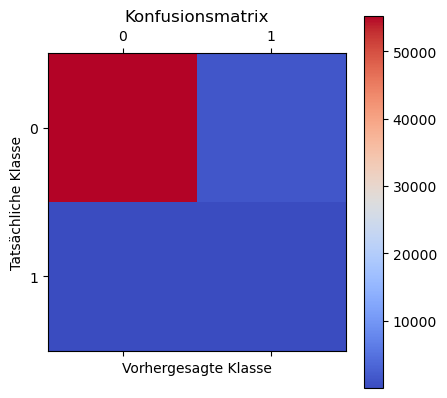

In [18]:
#Konfusions-Matrix zeigt anzahl der True-Positives, False-Positives, True-Negatives, False-Negatives

# Predictions mit dem Modell (z. B. 'model') auf Testdaten
y_pred_balanced = LG_model_balanced.predict(X_test)

# Konfusionsmatrix berechnen
cm = confusion_matrix(y_test, y_pred_balanced)

# Konfusionsmatrix anzeigen
print("Konfusionsmatrix:")
print(cm)

# Optional: Visualisierung der Konfusionsmatrix
plt.matshow(cm, cmap='coolwarm')
plt.title('Konfusionsmatrix')
plt.colorbar()
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()


Konfusionsmatrix:
[[55172  1479]
 [   12    83]]


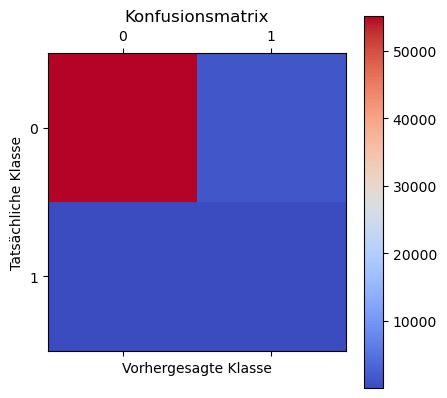

In [19]:
# Predictions mit dem Modell (z. B. 'model') auf Testdaten
y_pred_SMOTE = LG_model_SMOTE.predict(X_test)

# Konfusionsmatrix berechnen
cm = confusion_matrix(y_test, y_pred_SMOTE)

# Konfusionsmatrix anzeigen
print("Konfusionsmatrix:")
print(cm)

# Optional: Visualisierung der Konfusionsmatrix
plt.matshow(cm, cmap='coolwarm')
plt.title('Konfusionsmatrix')
plt.colorbar()
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()

In [20]:
# Precision, Recall, F1-Score von model mit class_weight = 'balanced'
'''
Precision: Wie viele der vorhergesagten Betrugsfälle sind tatsächlich Betrug?
Recall: Wie viele der tatsächlichen Betrugsfälle wurden erkannt?
F1-Score: Harmonie zwischen Precision und Recall.
'''
print(classification_report(y_test, y_pred_balanced, target_names=["Kein Betrug", "Betrug"]))

#f1-score für modelle wo Klassen stark unterschiedlich groß sind


              precision    recall  f1-score   support

 Kein Betrug       1.00      0.98      0.99     56651
      Betrug       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746



In [21]:
# Precision, Recall, F1-Score von model mit SMOTE

print(classification_report(y_test, y_pred_SMOTE, target_names=["Kein Betrug", "Betrug"]))

              precision    recall  f1-score   support

 Kein Betrug       1.00      0.97      0.99     56651
      Betrug       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746



In [22]:
# Der ROC-AUC-Wert zeigt, wie gut das Modell zwischen den Klassen unterscheidet.

# Wahrscheinlichkeiten für die positive Klasse
y_pred_proba = LG_model_balanced.predict_proba(X_test)[:, 0]

# ROC-AUC berechnen
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC-Wert: {roc_auc:.2f}")


ROC-AUC-Wert: 0.03


In [23]:
y_pred_proba = LG_model_SMOTE.predict_proba(X_test)[:, 0]

# ROC-AUC berechnen
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC-Wert: {roc_auc:.2f}")

ROC-AUC-Wert: 0.04


Konfusionsmatrix:
[[56635    16]
 [   21    74]]


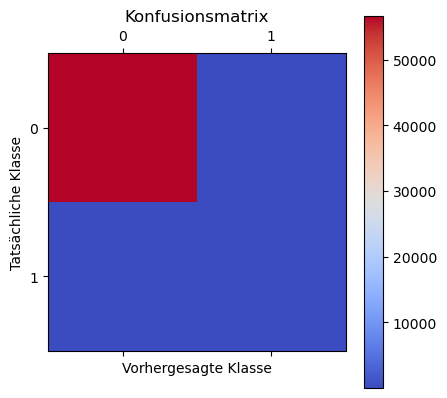

In [24]:

LG_model_better_balanced = LogisticRegression(class_weight={0: 1, 1: 10}, random_state=42)
LG_model_better_balanced.fit(X_train, y_train)

#Konfusions-Matrix zeigt anzahl der True-Positives, False-Positives, True-Negatives, False-Negatives

# Predictions mit dem Modell (z. B. 'model') auf Testdaten
y_pred_better_balanced = LG_model_better_balanced.predict(X_test)

# Konfusionsmatrix berechnen
cm = confusion_matrix(y_test, y_pred_better_balanced)

# Konfusionsmatrix anzeigen
print("Konfusionsmatrix:")
print(cm)

# Optional: Visualisierung der Konfusionsmatrix
plt.matshow(cm, cmap='coolwarm')
plt.title('Konfusionsmatrix')
plt.colorbar()
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()


In [25]:
print(classification_report(y_test, y_pred_better_balanced, target_names=["Kein Betrug", "Betrug"]))

              precision    recall  f1-score   support

 Kein Betrug       1.00      1.00      1.00     56651
      Betrug       0.82      0.78      0.80        95

    accuracy                           1.00     56746
   macro avg       0.91      0.89      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [26]:
'''
svm_model1 = LinearSVC(class_weight={0: 1, 1: 10}, random_state=42, C=0.5, max_iter=10000)
svm_model1.fit(X_train, y_train)


joblib.dump(svm_model1, 'svm_model1.sav')
'''

"\nsvm_model1 = LinearSVC(class_weight={0: 1, 1: 10}, random_state=42, C=0.5, max_iter=10000)\nsvm_model1.fit(X_train, y_train)\n\n\njoblib.dump(svm_model1, 'svm_model1.sav')\n"

In [27]:
svm_model1 = joblib.load('svm_model1.sav')

In [28]:
y_pred = svm_model1.predict(X_test)

In [29]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred, target_names=["Kein Betrug", "Betrug"]))


[[56640    11]
 [   22    73]]
              precision    recall  f1-score   support

 Kein Betrug       1.00      1.00      1.00     56651
      Betrug       0.87      0.77      0.82        95

    accuracy                           1.00     56746
   macro avg       0.93      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [30]:
'''
plattSC_svm_model1 = CalibratedClassifierCV(svm_model1, method='sigmoid', cv=5)

plattSC_svm_model1.fit(X_train, y_train)

joblib.dump(plattSC_svm_model1, 'plattSC_svm_model1.sav')
'''

"\nplattSC_svm_model1 = CalibratedClassifierCV(svm_model1, method='sigmoid', cv=5)\n\nplattSC_svm_model1.fit(X_train, y_train)\n\njoblib.dump(plattSC_svm_model1, 'plattSC_svm_model1.sav')\n"

In [31]:
plattSC_svm_model1 = joblib.load('plattSC_svm_model1.sav')

In [32]:
y_pred_proba_plattSC = plattSC_svm_model1.predict_proba(X_test)[: ,1]

In [33]:
roc_auc = roc_auc_score(y_test, y_pred_proba_plattSC)
print(f"ROC-AUC-Wert: {roc_auc:.2f}")

ROC-AUC-Wert: 0.96


Precison-Recall-Curve (PR-Kurve):
- gut bei unausgeglichenen Daten (definitv besser als ROC-Kurve)
- zeigt Trade-off zwischen Precision und Recall anhand von Schwellenwerten
- wo Kurve sehr hoch ist, bester Schwellenwert (Precision und Recall gut)
- konzentriert sich auf positive Klasse (Betrug)


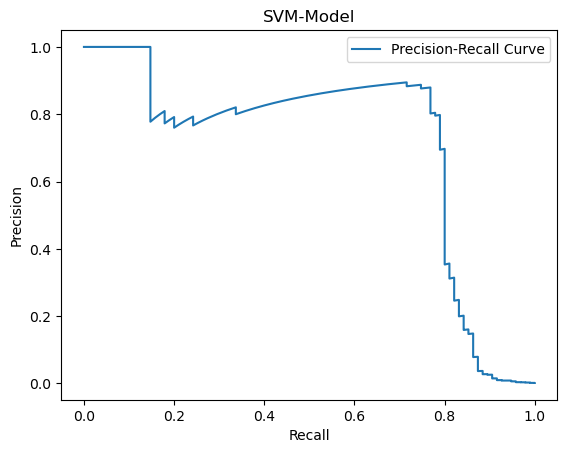

In [34]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Wahrscheinlichkeiten für die positive Klasse
y_pred_proba = svm_model1.decision_function(X_test)

# Precision-Recall-Werte berechnen
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# PR-Kurve plotten
plt.plot(recalls, precisions, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("SVM-Model")
plt.legend()
x1 = plt.show()


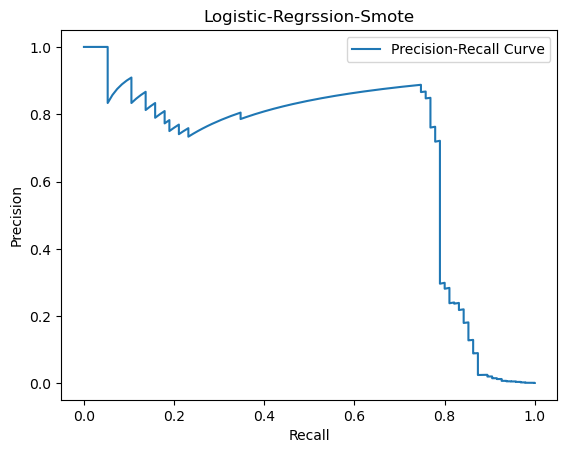

In [35]:

y_pred_proba = LG_model_SMOTE.decision_function(X_test)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recalls, precisions, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Logistic-Regrssion-Smote")
plt.legend()
x2 = plt.show()


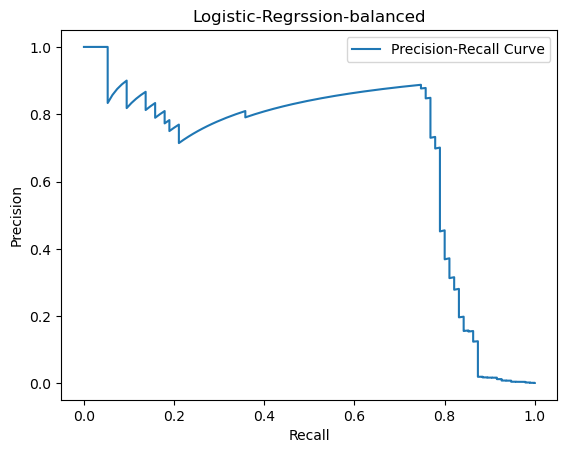

In [36]:

y_pred_proba = LG_model_balanced.decision_function(X_test)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recalls, precisions, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Logistic-Regrssion-balanced")
plt.legend()
plt.show()


In [37]:

#Schwellenwert anpassen Beispiel:


# Wahrscheinlichkeiten vorhersagen
y_pred_proba = svm_model1.decision_function(X_test)

# Schwellenwert setzen (z. B. 0.3)
threshold = 0.3
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Neue Metriken berechnen
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_adjusted, target_names=["Kein Betrug", "Betrug"]))


              precision    recall  f1-score   support

 Kein Betrug       1.00      1.00      1.00     56651
      Betrug       0.89      0.74      0.80        95

    accuracy                           1.00     56746
   macro avg       0.94      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746



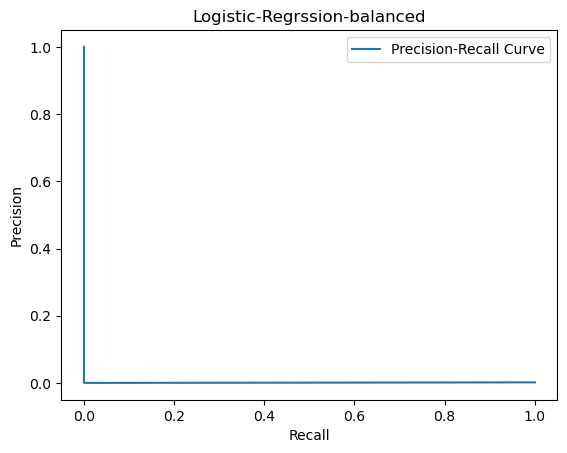

In [41]:
y_pred_proba = plattSC_svm_model1.predict_proba(X_test)[:, 0]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recalls, precisions, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Logistic-Regrssion-balanced")
plt.legend()
plt.show()